In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sympy.physics.quantum.trace import Tr

In [4]:
# Load the dataset
file_path = "data/dataset.csv"
data = pd.read_csv(file_path)

In [5]:
print(data.head())
print("---------------------------------------------")
print(data.describe())
print("---------------------------------------------")
print(data.shape)
print("---------------------------------------------")
print(data.info())

   player_id                   Name Sex            Team  NOC  Year  Season  \
0          0              A Dijiang   M           China  CHN  1992  Summer   
1          1               A Lamusi   M           China  CHN  2012  Summer   
2          2            Gunnar Aaby   M         Denmark  DEN  1920  Summer   
3          3            Edgar Aabye   M  Denmark/Sweden  DEN  1900  Summer   
4         26  Cornelia (-strannood)   F     Netherlands  NED  1932  Summer   

          City       Sport                         Event     Medal  
0    Barcelona  Basketball   Basketball Men's Basketball  No medal  
1       London        Judo  Judo Men's Extra-Lightweight  No medal  
2    Antwerpen    Football       Football Men's Football  No medal  
3        Paris  Tug-Of-War   Tug-Of-War Men's Tug-Of-War      Gold  
4  Los Angeles   Athletics  Athletics Women's 100 metres  No medal  
---------------------------------------------
          player_id           Year
count  2.525650e+05  252565.000000
m

In [5]:
# Check for null data
print(data.isnull().sum())

player_id    0
Name         0
Sex          0
Team         0
NOC          0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64


In [39]:
# Unique values in key columns
print("Unique year values found in csv: ", data['Year'].unique())
print("\nUnique sports found in data: ", data['Sport'].unique())
print("\nUnique cities found in data:", data['City'].unique())
print("\nUnique events found in data:", data['Event'].unique())
print("\nUnique seasons found in data:", data['Season'].unique())

Unique year values found in csv:  [1992 2012 1920 1900 1932 1952 2000 1996 1912 1924 1948 2008 2016 2004
 1984 1968 1972 1988 1936 1956 1960 1928 1976 1980 1964 1906 1904 1908
 1896 2020 2024]

Unique sports found in data:  ['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Athletics' 'Swimming'
 'Badminton' 'Sailing' 'Gymnastics' 'Art Competitions' 'Handball'
 'Weightlifting' 'Wrestling' 'Water Polo' 'Hockey' 'Rowing' 'Fencing'
 'Equestrianism' 'Shooting' 'Boxing' 'Taekwondo' 'Cycling' 'Diving'
 'Canoeing' 'Tennis' 'Modern Pentathlon' 'Golf' 'Softball' 'Archery'
 'Volleyball' 'Synchronized Swimming' 'Table Tennis' 'Baseball'
 'Rhythmic Gymnastics' 'Rugby Sevens' 'Trampolining' 'Beach Volleyball'
 'Triathlon' 'Rugby' 'Lacrosse' 'Polo' 'Cricket' 'Ice Hockey' 'Racquets'
 'Motorboating' 'Croquet' 'Figure Skating' 'Jeu De Paume' 'Roque'
 'Basque Pelota' 'Alpinism' 'Aeronautics' 'Cycling Road'
 'Artistic Gymnastics' 'Karate' 'Baseball/Softball'
 'Trampoline Gymnastics' 'Marathon Swimming' 'Canoe

In [6]:
data.columns

print((data['Team'].unique()).tolist())

['China', 'Denmark', 'Denmark/Sweden', 'Netherlands', 'Finland', 'Norway', 'Romania', 'Estonia', 'France', 'Taifun', 'Morocco', 'Spain', 'Egypt', 'Iran', 'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia', 'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey', 'Chile', 'Mexico', 'United States', 'Soviet Union', 'Nicaragua', 'Hungary', 'Nigeria', 'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'United Arab Republic', 'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Thessalonki-1', 'Canada', 'Ireland', 'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan', 'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros', 'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Syria', 'Maldives', 'Ethiopia', 'United Arab Emirates', 'North Yemen', 'Indonesia', 'Philippines', 'Singapore', 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan', 'Unified Team', 'Japan', 'Congo (Brazzaville)', 'Switzerland', 'Brazil', 'East Germany', 'Monaco', 'Fornebo', 'Israel', 'Vesper Boat Club', 'Ur

In [19]:
medal_counts_per_year = data.pivot_table(index='Year', columns='Medal', aggfunc='size', fill_value=0)

# Calculate total medals per year
medal_counts_per_year['total'] = medal_counts_per_year.sum(axis=1)

print(medal_counts_per_year)

Medal  Bronze  Gold  No medal  Silver  Total_Medals
Year                                               
1896       38    62       237      43           380
1900      175   201      1332     228          1936
1904      150   173       815     163          1301
1906      145   157      1275     156          1733
1908      256   294      2270     281          3101
1912      300   326      3099     315          4040
1920      367   493      2984     448          4292
1924      274   277      4401     281          5233
1928      250   245      4258     239          4992
1932      204   229      2322     214          2969
1936      295   312      5589     310          6506
1948      279   289      5553     284          6405
1952      300   306      7373     291          8270
1956      298   302      4234     293          5127
1960      308   309      7208     294          8119
1964      343   347      6673     339          7702
1968      358   359      7531     340          8588
1972      41

In [ ]:
medal_counts = data.pivot_table(index='Name', columns='Medal', aggfunc='size', fill_value=0)

# Ensure all medal types are present (even if some are missing in dataset)
medal_types = ['No medal', 'Gold', 'Bronze', 'Silver']
for medal in medal_types:
    if medal not in medal_counts.columns:
        medal_counts[medal] = 0  # Add missing medal type with count 0

# Calculate total appearances (sum of all medals)
medal_counts['Total_Appearances'] = medal_counts.sum(axis=1)

# Sort by total medals (gold first, then silver, then bronze)
medal_counts = medal_counts.sort_values(by=['Gold', 'Silver', 'Bronze', 'Total_Appearances'], ascending=False)

# Get top 5 sportsmen
top_5 = medal_counts.head(5)

print(top_5)

Medal            Bronze  Gold  No medal  Silver  Total_Appearances
Name                                                              
Michael Ii            2    23         2       3                 30
Charles Jr.           2    10        15       4                 31
Raymond Ewry          0    10         0       0                 10
Larysa (diriy-)       4     9         1       5                 19
Paavo Nurmi           0     9         0       3                 12


In [9]:
# Mapping of countries to continents
continent_map = {
    'asia': ['China', 'Iran', 'Pakistan', 'India', 'Malaysia', 'Japan', 'Thailand', 'Indonesia', 'Philippines', 
             'Singapore', 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan', 'Kazakhstan', 'Brunei', 'Turkmenistan', 
             'Saudi Arabia', 'Syria', 'Maldives', 'United Arab Emirates', 'North Yemen', 'Lebanon', 'Qatar', 
             'Jordan', 'Palestine', 'Bahrain', 'Kuwait', 'Iraq', 'Afghanistan', 'Mongolia', 'Bangladesh', 
             'Sri Lanka', 'Nepal', 'Vietnam', 'Myanmar', 'Yemen', 'Oman', 'Cambodia', 'Bhutan', 'Chinese Taipei'],
    
    'europe': ['Denmark', 'Sweden', 'Netherlands', 'Finland', 'Norway', 'Romania', 'Estonia', 'France', 'Spain', 
               'Bulgaria', 'Italy', 'Russia', 'Belarus', 'Greece', 'Turkey', 'Germany', 'Ireland', 'Belgium', 
               'Portugal', 'Slovenia', 'Luxembourg', 'Czech Republic', 'Poland', 'Hungary', 'Ukraine', 'Iceland', 
               'Switzerland', 'Austria', 'Lithuania', 'Cyprus', 'Slovakia', 'Latvia', 'Moldova', 'Serbia', 
               'Montenegro', 'Bosnia and Herzegovina', 'Croatia', 'Macedonia', 'Albania', 'Andorra', 'San Marino', 
               'Liechtenstein', 'Monaco', 'Great Britain', 'Soviet Union', 'Unified Team'],

    'africa': ['Morocco', 'Egypt', 'Chad', 'Sudan', 'Algeria', 'Ethiopia', 'Eritrea', 'Tanzania', 'Tunisia', 'Libya', 
               'Djibouti', 'Comoros', 'Mauritius', 'Seychelles', 'Nigeria', 'Cameroon', "Cote d'Ivoire", 'Kenya', 
               'Benin', 'Ghana', 'Somalia', 'Niger', 'Mali', 'Uganda', 'Angola', 'South Africa', 'Senegal', 'Togo', 
               'Namibia', 'Guinea', 'Guinea Bissau', 'Burkina Faso', 'Mozambique', 'Madagascar', 'Rwanda', 
               'Equatorial Guinea', 'Central African Republic', 'Botswana', 'Liberia', 'Sierra Leone', 'Gambia', 
               'Zimbabwe', 'Zambia', 'Malawi', 'Burundi', 'Sao Tome and Principe', 'Swaziland'],

    'north_america': ['United States', 'Canada', 'Mexico', 'Cuba', 'Nicaragua', 'Costa Rica', 'Panama', 'Jamaica', 
                      'Haiti', 'Dominican Republic', 'Puerto Rico', 'Honduras', 'El Salvador', 'Guatemala', 
                      'Bahamas', 'Trinidad and Tobago', 'Belize', 'Saint Kitts and Nevis', 'Saint Vincent and the Grenadines', 
                      'Dominica', 'Barbados', 'Bermuda', 'Saint Lucia', 'Cayman Islands', 'Antigua and Barbuda', 
                      'United States Virgin Islands', 'British Virgin Islands', 'West Indies Federation', 'Greenland'],

    'south_america': ['Argentina', 'Chile', 'Brazil', 'Venezuela', 'Colombia', 'Paraguay', 'Peru', 'Guyana', 'Uruguay', 
                      'Ecuador', 'Suriname', 'Bolivia'],

    'australia': ['Australia', 'New Zealand', 'Fiji', 'Papua New Guinea', 'Vanuatu', 'Solomon Islands', 'Samoa', 
                'American Samoa', 'Palau', 'Marshall Islands', 'Micronesia', 'Kiribati', 'Nauru', 'Tuvalu']
}

# Function to determine continent
def get_continent(country):
    # Handling combined country names like "Denmark/Sweden"
    if '/' in country:
        parts = country.split('/')
        for part in parts:
            for continent, countries in continent_map.items():
                if part.strip() in countries:
                    return continent  # Return first matched continent
    else:
        for continent, countries in continent_map.items():
            if country in countries:
                return continent
    return 'Unknown'  # Default if not found

# Applying the function
data['Continent'] = data['Team'].apply(get_continent)

medal_counts = data.pivot_table(index='Continent', columns='Medal', aggfunc='size', fill_value=0)

medal_counts['total'] = medal_counts.sum(axis=1)

print(medal_counts)


Medal          Bronze  Gold  No medal  Silver   total
Continent                                            
Unknown          1580  1626     20272    1755   25233
africa            284   198     12867     201   13550
asia             1037  1032     22834     997   25900
australia         727   571      9730     637   11665
europe           7004  6253    107531    6788  127576
north_america    1996  3045     28708    1989   35738
south_america     442   277     11805     379   12903


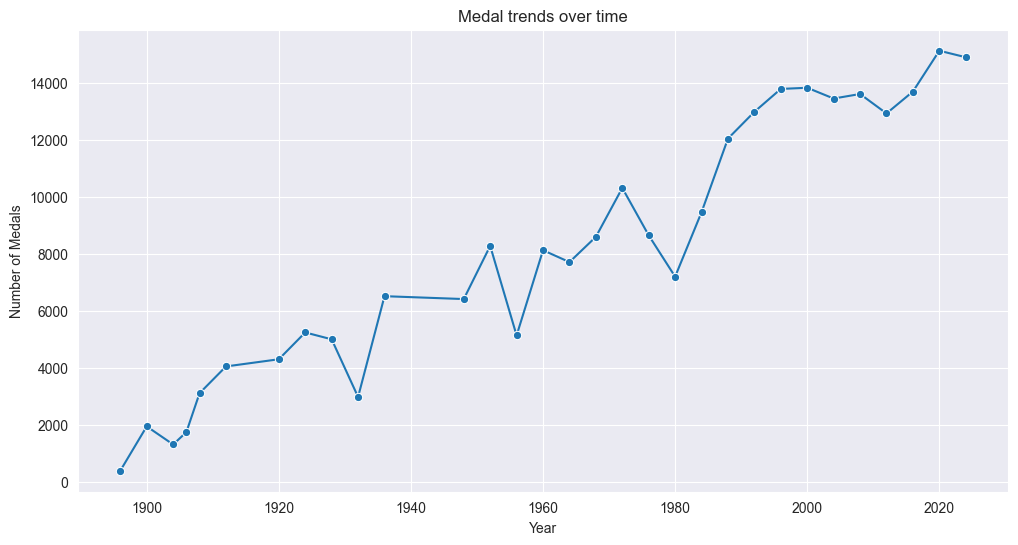

In [11]:
# Medal trends over time, aka how many medals were awarded during each games
medal_trends = data[data['Medal'].notnull()].groupby('Year').size().reset_index(name='Medal count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=medal_trends, x='Year', y='Medal count', marker='o')
plt.title('Medal trends over time')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.grid(True)
plt.show()

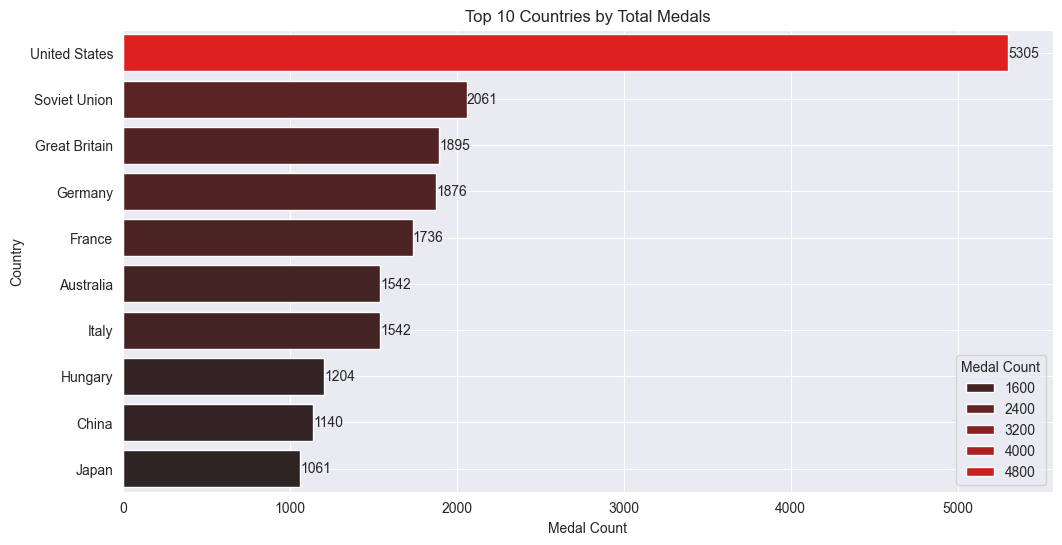

In [27]:
# Top 10 countries by total medals
top_countries = data[data['Medal'] != "No medal"].groupby('Team').size().nlargest(10).reset_index(name='Medal Count')

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries, x='Medal Count', y='Team', palette='dark:red', hue='Medal Count')

for index, row in top_countries.iterrows():
    plt.text(row['Medal Count'] + 1, index, str(row['Medal Count']), va='center', ha='left', fontsize=10)

plt.title('Top 10 Countries by Total Medals')
plt.xlabel('Medal Count')
plt.ylabel('Country')
plt.grid(True)
plt.show()


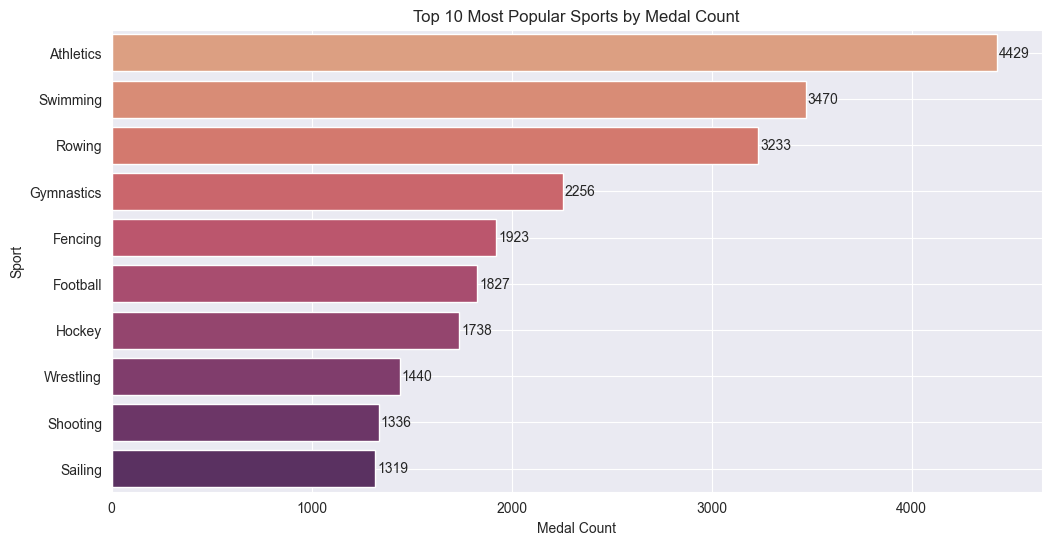

In [38]:
# Most popular sports, when it comes to amount of medals won in each sport
# Count medals by sport
popular_sports = data[data['Medal'] != "No medal"].groupby('Sport').size().nlargest(10).reset_index(name='Medal Count')

# Horizontal bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=popular_sports, x='Medal Count', y='Sport', palette='flare', hue='Sport')

# Add numbers above the bars
for index, row in popular_sports.iterrows():
    plt.text(row['Medal Count'] + 10, index, str(row['Medal Count']), va='center', ha='left', fontsize=10)

plt.title('Top 10 Most Popular Sports by Medal Count')
plt.xlabel('Medal Count')
plt.ylabel('Sport')
plt.grid(True)
plt.show()


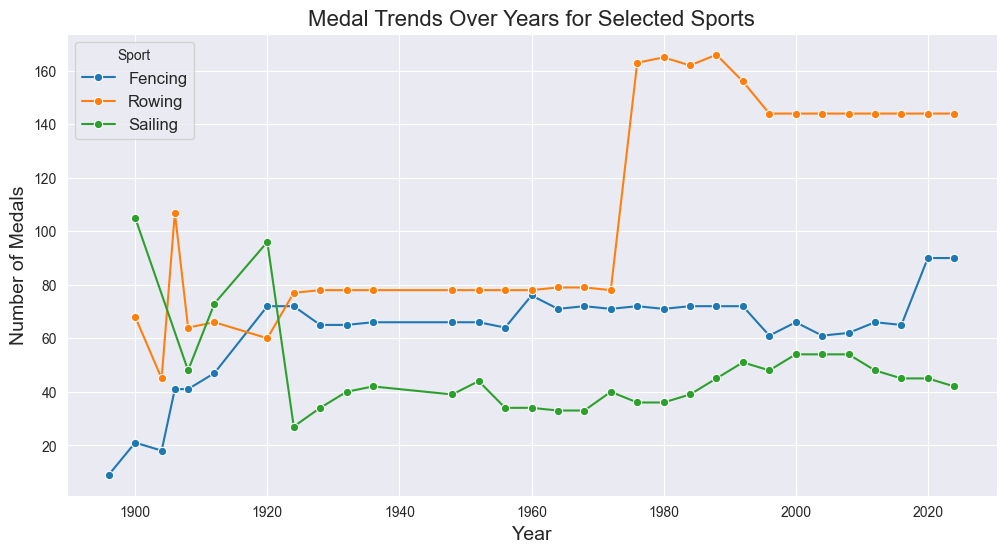

In [42]:
# Line plot for amount of medals won by chosen sport by year
medal_data = data[data['Medal'] != "No medal"]

chosen_sports = ['Fencing', 'Rowing', 'Sailing']

filtered_data = medal_data[medal_data['Sport'].isin(chosen_sports)]

medals_by_year_sport = (
    filtered_data.groupby(['Year', 'Sport']).size().reset_index(name='Medal Count')
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=medals_by_year_sport,
    x='Year', y='Medal Count', hue='Sport', marker='o', palette='tab10'
)

plt.title('Medal Trends Over Years for Selected Sports', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Medals', fontsize=14)
plt.legend(title='Sport', fontsize=12)
plt.grid(True)
plt.show()

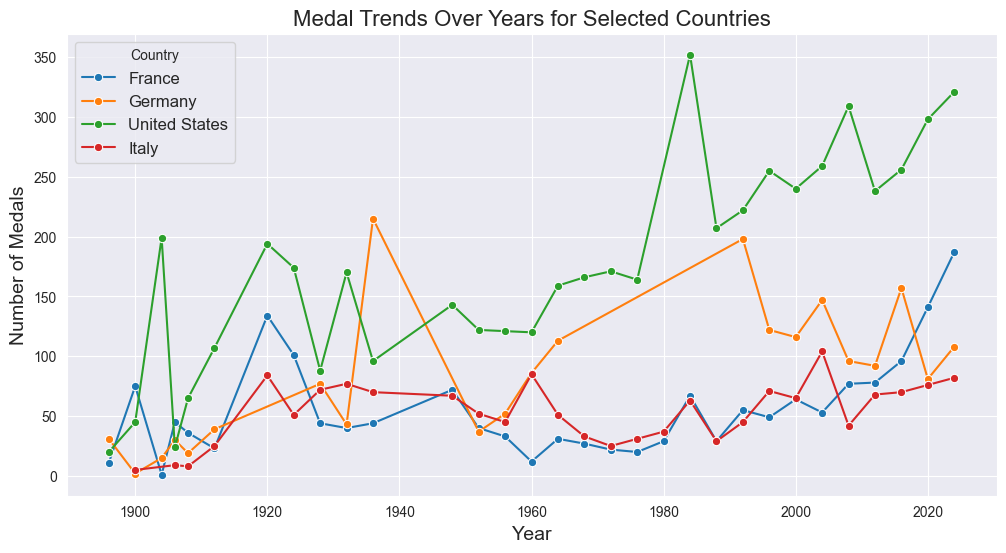

In [41]:
# Line plot for amount of medals won by chosen country by year
medal_data = data[data['Medal'] != "No medal"]

chosen_countries = ['United States', 'Germany', 'France', 'Italy']

filtered_data = medal_data[medal_data['Team'].isin(chosen_countries)]

medals_by_year_country = (
    filtered_data.groupby(['Year', 'Team']).size().reset_index(name='Medal Count')
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=medals_by_year_country,
    x='Year', y='Medal Count', hue='Team', marker='o', palette='tab10'
)

plt.title('Medal Trends Over Years for Selected Countries', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Medals', fontsize=14)
plt.legend(title='Country', fontsize=12)
plt.grid(True)
plt.show()

In [1]:
data.head()

NameError: name 'data' is not defined

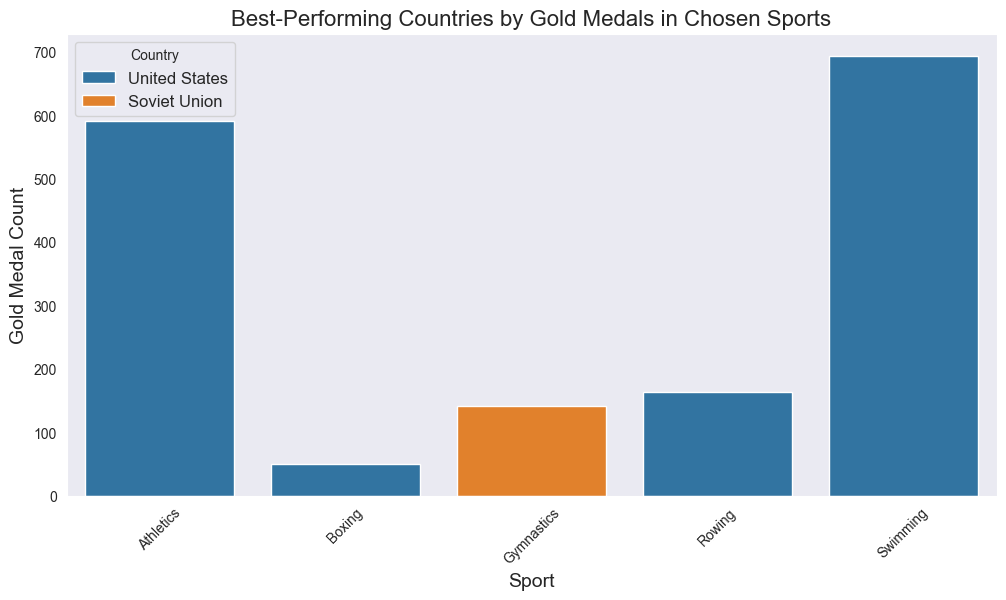

In [46]:
# Filter data for gold medals only
gold_medals = data[data['Medal'] == "Gold"]

# Define the sports you're interested in
chosen_sports = ['Athletics', 'Swimming', 'Gymnastics', 'Rowing', 'Boxing']  # Replace with your sports

# Filter data for the chosen sports
filtered_gold = gold_medals[gold_medals['Sport'].isin(chosen_sports)]

# Find the best-performing country in each sport
best_countries = (
    filtered_gold.groupby(['Sport', 'Team']).size()
    .reset_index(name='Gold Medal Count')
    .sort_values(['Sport', 'Gold Medal Count'], ascending=[True, False])
)

# Keep only the top country per sport
top_performers = best_countries.groupby('Sport').first().reset_index()

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_performers, x='Sport', y='Gold Medal Count', hue='Team', palette='tab10')

# Customize the plot
plt.title('Best-Performing Countries by Gold Medals in Chosen Sports', fontsize=16)
plt.xlabel('Sport', fontsize=14)
plt.ylabel('Gold Medal Count', fontsize=14)
plt.legend(title='Country', fontsize=12)
plt.grid(axis='y')
plt.xticks(rotation=45)  # Rotate sport names for better readability
plt.show()
